# HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only NUMPY can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Linear regression model
### Load regression data

In [ ]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

(750,)


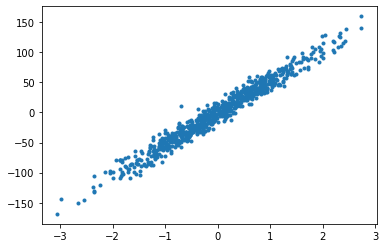

In [ ]:
y_train = y_train.reshape((750, )) # the shape of y_train is different from that of x_train, need to reshape
y_test = y_test.reshape((250, ))   # the shape of y_test is different from that of x_test, need to reshape
plt.plot(x_train, y_train, '.')

### Train your model
#### Pseudo code:
    1. Random initialize the weights, intercepts of the linear model
**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 

**End of training**

In [ ]:
def linear_regression_train(x_train, y_train):
    
    # assume y = mx + b
    # we need to find m and b first, assume m is 50, and b is 0
    # ************************************************************
    m = 50
    b = 0
    
    iterations = 3000 # number of iterations
    lr = 1e-3 # learning rate
    
    # declare loss for each iteration, set original value to zeros
    loss = np.zeros((iterations, ))
    
    # start iterations
    for i in range (iterations):
        
        # y = mx + b
        # caculate predicted value
        y_pred = m*x_train + b

        
        # calculate loss
        # loss function: (1/2) * mean ((actual_data - predicted_result)**2)
        loss[i] = (1/2) * np.mean((y_train - y_pred)**2)
        

        # update m and b using gradient descent
        # loss function: (1/2) * mean((actual_data - predicted_result)**2)
        
        # gradient of m: mean((m*x + b - y) * x)
        tmp = m*x_train + b - y_train
        m_gradient = (tmp*x_train).mean()
        
        # gradient of b: mean(m*x + b - y)
        b_gradient = tmp.mean()
        
        # update m and b
        m += -lr * m_gradient
        b += -lr * b_gradient
        
    return m, b, loss

# train and get m, b, loss for prediction and evaluation
m, b, loss = linear_regression_train(x_train, y_train)

### Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [ ]:
# caculate the predicted result for test
y_pred = m*x_test + b

In [ ]:
# visualize the learning curve with loss data
def learning_curve_fig(loss):
    plt.title("training loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.plot(loss, linewidth=4, color='red')
    plt.show()

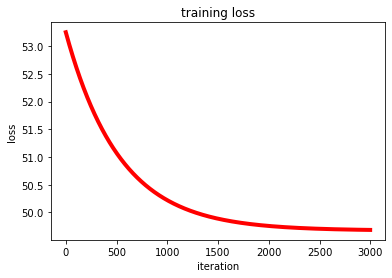

MSE: 54.98338097822707
weights(m): 52.57670818578662
intercepts(b): -0.3260902413167747


In [ ]:
# plot the learning curve of the training
learning_curve_fig(loss)

# mean Square Error of my prediction and ground truth
mse = (1/2) * np.mean((y_pred - y_test)**2)
print(f'MSE: {mse}')
      
# weights and intercepts of my linear model
print(f'weights(m): {m}')
print(f'intercepts(b): {b}')

## Part 2. Logistic regression model
### Load regression data

In [30]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

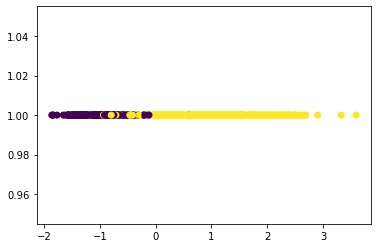

In [31]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [32]:
# reshape data into proper dimensions
# dimensions: W is n*1, X is n*m, Y is 1*m
# n is # of features, m is # of observations

x_train = x_train.T # x_train: 750*1 ->  1*750
y_train = y_train.reshape(1, x_train.shape[1]) # y_train: (750, ) -> 1*750
x_test = x_test.T # x_test: 250*1 ->  1*250
y_test = y_test.reshape(1, x_test.shape[1]) # y_test: (250, ) -> 1*250

In [33]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [34]:
def logistic_regression_train(x_train, y_train):
    
    # assume y = sigmoid(W·X + B)
    # dimensions: W is n*1, X is n*m, Y is 1*m
    # we need to find W and B, assume W is a zero matrix, and B is 0
    # ************************************************************
    n = x_train.shape[0] # number of features
    m = x_train.shape[1] # number of observations
    
    W = np.zeros((n, 1)) # an n*1 matrix
    B = 0
    
    iterations = 1000 # number of iterations
    lr = 0.0005 # learning rate
    
    # declare loss for each iteration, set original value to zeros
    loss = np.zeros((iterations, ))
    
    # start iterations
    for i in range (iterations):
        
        
        # caculate predicted value
        # y = sigmoid(W·X + B)
        # W is n*1, X is n*m, Y is 1*m
        z = np.dot(W.T, x_train) + B # Z = W·X + B
        y_pred = sigmoid(z) # y = sigmoid(Z)
      
        # calculate loss by Cross Entropy Error
        # loss function: (-1/m)*(y_train * log(y_pred) + (1 - y_train)*log(1 - y_pred))
        loss[i] = -1*np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
        

        # update W and B using Gradient Descent
        # W is n*1, X is n*m, Y is 1*m
        # gradient of W: (1/m)*((y_pred - y_train)·x_train.Transpose)
        dW = np.mean(np.dot((y_pred - y_train), x_train.T))
        # gradient of B: (1/m)*(sum(y_pred - y_train))
        dB = np.mean(np.sum(y_pred - y_train))
        
        # update W and B
        W += -lr * dW.T
        B += -lr * dB
        
    return W, B, loss

# train and get W, B, loss for prediction and evaluation
W, B, loss = logistic_regression_train(x_train, y_train)

In [35]:
# caculate the predicted result for test data
Z = np.dot(W.T, x_test) + B
y_pred = sigmoid(Z)

In [36]:
# visualize the learning curve with loss data
def learning_curve_fig(loss):
    plt.title("training loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.plot(loss, linewidth=4, color='red')
    plt.show()

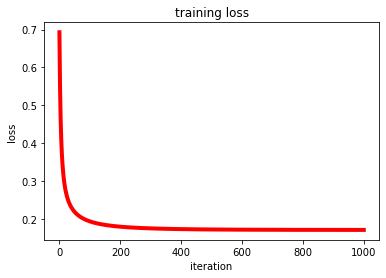

CEE: 0.18690431570340407
weights(W): [[4.71934749]]
intercepts(B): 1.6157019268841606


In [37]:
# plot the learning curve of the training
learning_curve_fig(loss)

# cross entropy error of my prediction and ground truth
CEE = -1*np.mean(y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred))
print(f'CEE: {CEE}')

# weights and intercepts of my logistic regression model
print(f'weights(W): {W}')
print(f'intercepts(B): {B}')

In [ ]:
""" testing the accuracy of the model
def accuracy(x, y, w, b):
    
    z = np.dot(w.T, x) + b
    y_pred = sigmoid(z)
    
    y_pred = y_pred > 0.5
    
    y_pred = np.array(y_pred, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(y_pred - y))/y.shape[1])*100
    print("Accuracy of the model is :", acc, "%")

accuracy(x_test, y_test, w, b)
"""

Accuracy of the model is : 96.0 %
